In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv",
                index_col = [0],
                parse_dates=True
                )
df.tail()

,value
date,
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-02,220144
2019-12-03,158549


## Clean data

In [3]:
df = df[(df['value'] >= df['value'].quantile(0.0025)) & (df['value'] <= df['value'].quantile(0.975))]
df.tail(10)

,value
date,
2019-11-16,125634
2019-11-17,131639
2019-11-20,151733
2019-11-21,169121
2019-11-23,146658
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


## Draw line plot

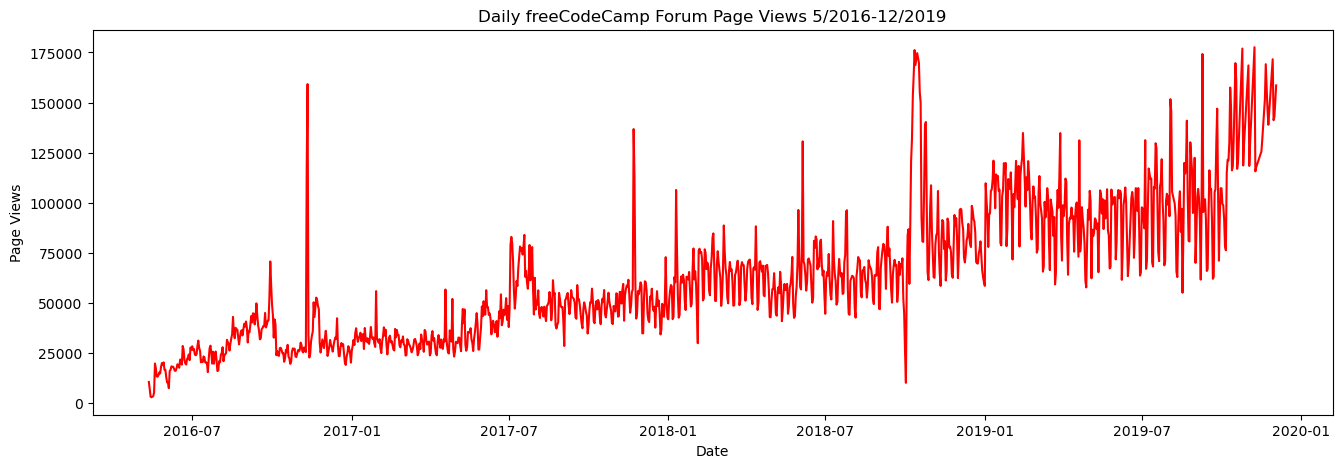

In [4]:
df_line = [plt.figure(figsize=(16, 5)),
           plt.plot(df.index, df['value'], c='r'),
           plt.xlabel('Date'),
           plt.ylabel('Page Views'),
           plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
          ]

## Copy and modify data for monthly bar plot

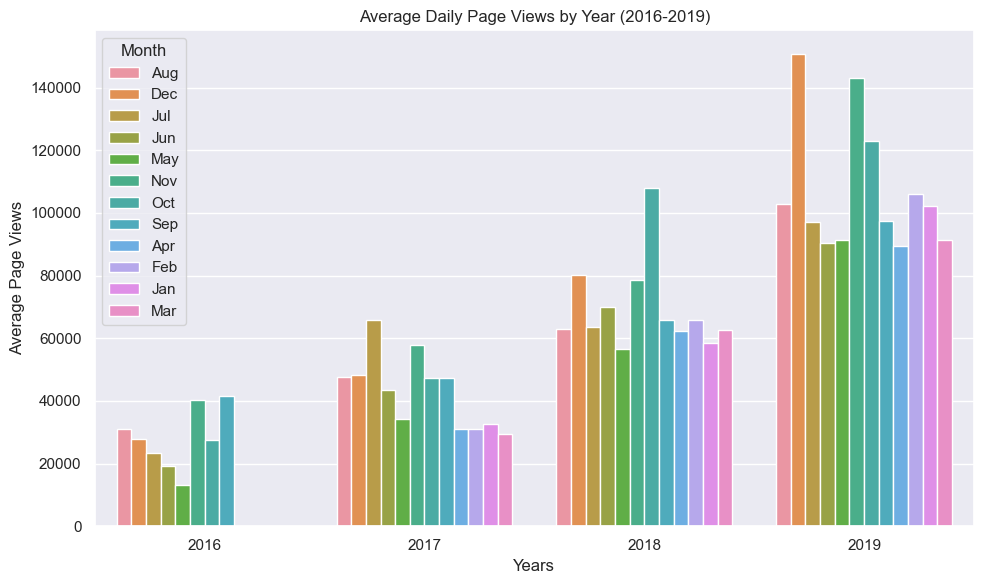

In [32]:
df_bar = df.copy()
df_bar['ID'] = range(1, len(df_bar) + 1)
df_bar['date'] = df.index
df_bar.insert(0, 'ID', df_bar.pop('ID'))
df_bar.set_index('ID')
df_bar.insert(1, 'date', df_bar.pop('date'))
df_bar = df_bar.set_index('ID')

### Extract year and month from the date column
df_bar['year'] = [d.year for d in df_bar.date] 
df_bar['month'] = [d.strftime('%b') for d in df_bar.date]

### Calculate average daily page views for each month grouped by year
monthly_avg = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()
monthly_avg

### Create a bar plot
sns.set_theme(style="darkgrid", color_codes=False, palette='colorblind')
sns.color_palette("Paired")
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='value', hue='month', data=monthly_avg,)
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.title('Average Daily Page Views by Year (2016-2019)')
plt.xticks(range(4), [2016, 2017, 2018, 2019])
plt.legend(title='Month', loc='upper left')
plt.tight_layout()
plt.show()


## Prepare data for box plots

In [12]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box

,date,value,year
0,2016-05-12,10539,2016
1,2016-05-13,6933,2016
2,2016-05-14,3127,2016
3,2016-05-15,2927,2016
4,2016-05-17,3403,2016
...,...,...,...
1262,2019-11-24,138875,2019
1263,2019-11-29,171584,2019
1264,2019-11-30,141161,2019
1265,2019-12-01,142918,2019


In [13]:
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-12,10539,2016,May
1,2016-05-13,6933,2016,May
2,2016-05-14,3127,2016,May
3,2016-05-15,2927,2016,May
4,2016-05-17,3403,2016,May
...,...,...,...,...
1262,2019-11-24,138875,2019,Nov
1263,2019-11-29,171584,2019,Nov
1264,2019-11-30,141161,2019,Nov
1265,2019-12-01,142918,2019,Dec


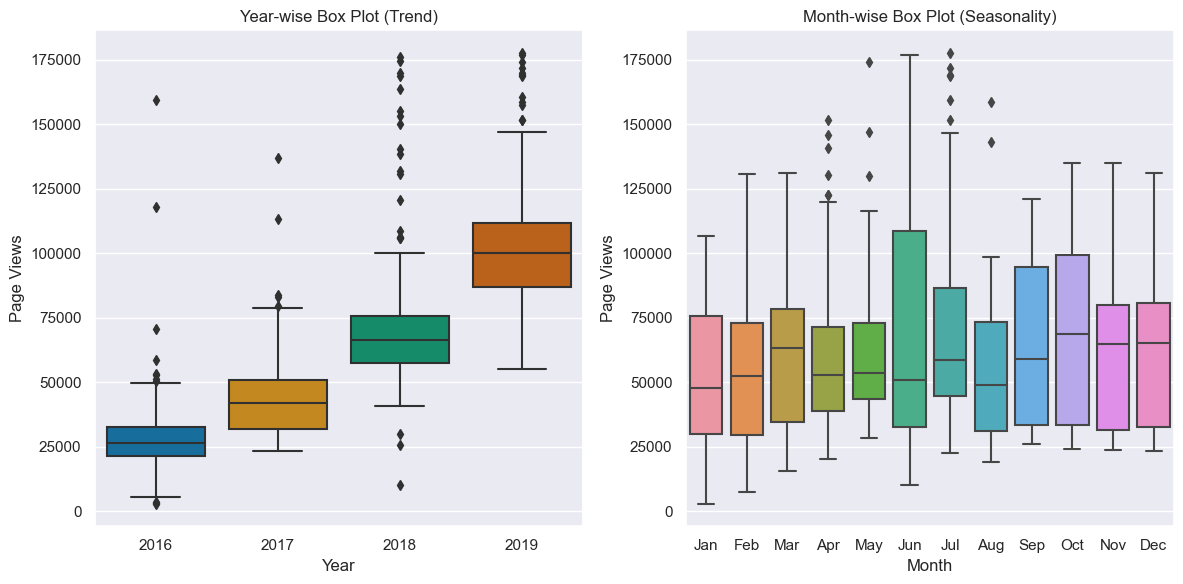

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='year', y='value', data=df_box)
plt.title('Year-wise Box Plot (Trend)')
plt.xlabel('Year')
plt.ylabel('Page Views')

plt.subplot(1, 2, 2)
sns.boxplot(x='month', y='value', data=df_box)
plt.title('Month-wise Box Plot (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Page Views')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=month_names)

plt.tight_layout()
plt.show()